In [1]:
from src.data_classes.dataset import Dataset

In [2]:
test_dataset = Dataset(r"D:\MAGISTERKA\anomaly_traffic_road\datasets\DoTA", "test")
test_dataset

(np.float64(-0.5), np.float64(226.5), np.float64(226.5), np.float64(-0.5))

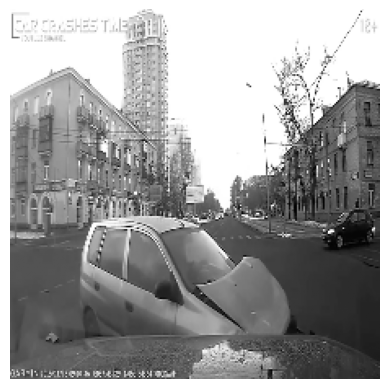

In [3]:
import matplotlib.pyplot as plt

plt.imshow(test_dataset[50][0].permute(1, 2, 0), cmap='gray')
plt.axis('off')

In [17]:
from src.models.ConvAE.ConvAE import ConvAE
import torch

torch.set_float32_matmul_precision('high')
model = ConvAE.load_from_checkpoint(r"D:\MAGISTERKA\anomaly_traffic_road\src\models\ConvAE\checkpoints\ConvAE-gray-epoch=9-val_loss=0.01.ckpt", input_shape=1)
model

RuntimeError: Error(s) in loading state_dict for ConvAE:
	size mismatch for encoder.conv_c3.weight: copying a param with shape torch.Size([128, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 256, 3, 3]).
	size mismatch for encoder.conv_c3.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.bn_c3.weight: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.bn_c3.bias: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.bn_c3.running_mean: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for encoder.bn_c3.running_var: copying a param with shape torch.Size([128]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for decoder.deconv_d3.weight: copying a param with shape torch.Size([128, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 256, 3, 3]).

tensor(0.0327)


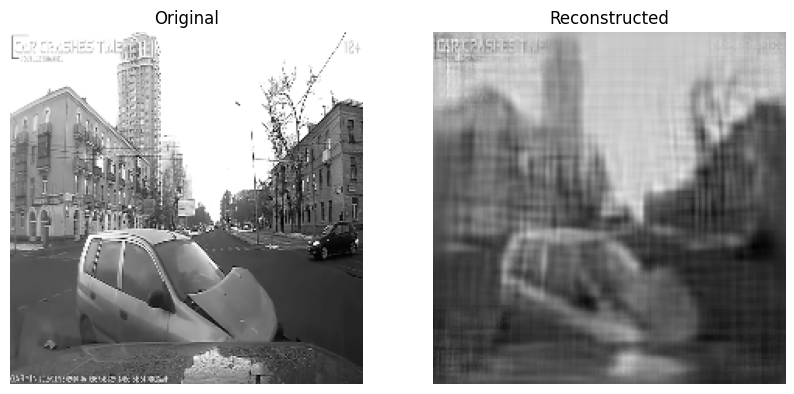

In [5]:
original = test_dataset[50][0].permute(1, 2, 0)
reconstructed = model(test_dataset[50][0].unsqueeze(0))[0].detach().permute(1, 2, 0)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(original, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original')
axs[1].imshow(reconstructed, cmap='gray')
plt.axis('off')
axs[1].set_title('Reconstructed')

from torch.functional import F
print(F.mse_loss(original, reconstructed))

tensor(0.0295)


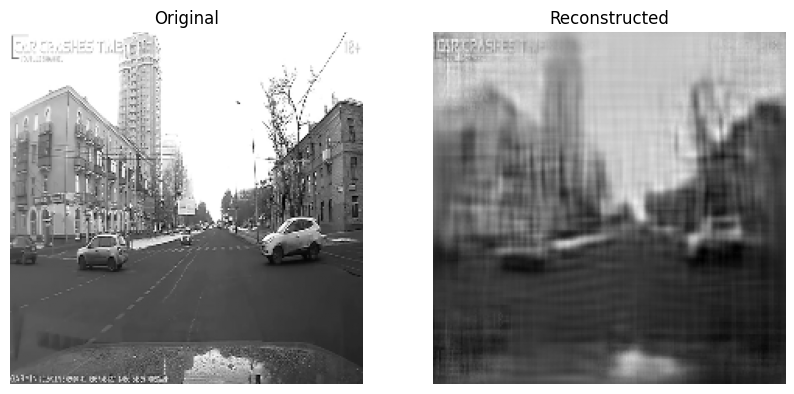

In [6]:
original = test_dataset[0][0].permute(1, 2, 0)
reconstructed = model(test_dataset[0][0].unsqueeze(0))[0].detach().permute(1, 2, 0)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(original, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original')
axs[1].imshow(reconstructed, cmap='gray')
plt.axis('off')
axs[1].set_title('Reconstructed')

from torch.functional import F
print(F.mse_loss(original, reconstructed))

In [18]:
from tqdm.notebook import tqdm

reconstruction_error = []
torch.set_float32_matmul_precision('high')

for x, y in tqdm(test_dataset):
    x, y = x.to(model.device), y.to(model.device)
    original = x.permute(1, 2, 0)
    reconstructed = model(x.unsqueeze(0))[0].detach().permute(1, 2, 0)
    reconstruction_error.append((F.mse_loss(original, reconstructed).cpu().item(), y.cpu().item()))

  0%|          | 0/70654 [00:00<?, ?it/s]

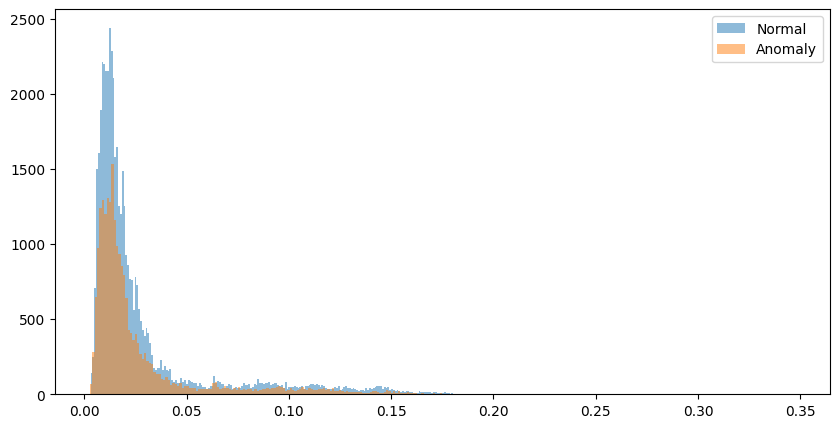

In [20]:
normal = [sample[0] for sample in reconstruction_error if sample[1] == 0]
anomaly = [sample[0] for sample in reconstruction_error if sample[1] == 1]

plt.figure(figsize=(10, 5))
_ = plt.hist(normal, bins=300, alpha=0.5, label='Normal')
_ = plt.hist(anomaly, bins=300, alpha=0.5, label='Anomaly')
plt.legend()

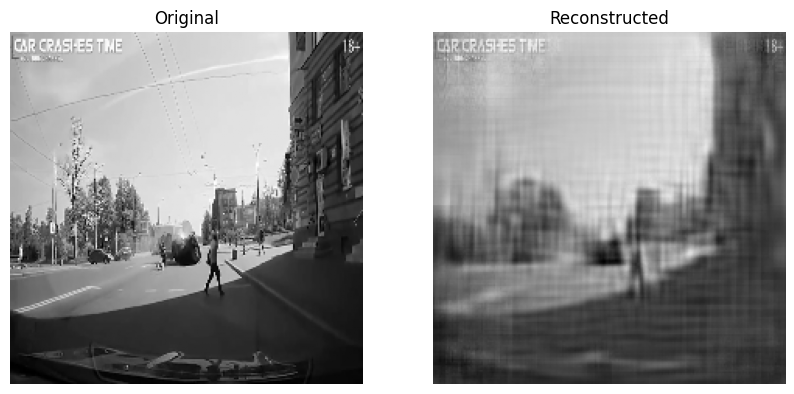

tensor(0.0114)


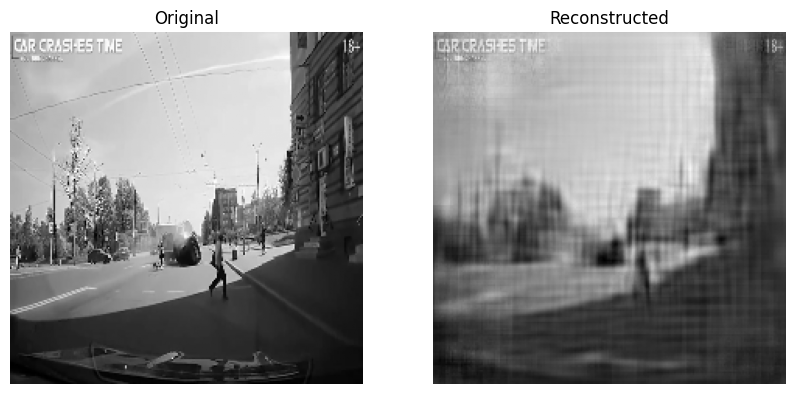

tensor(0.0115)


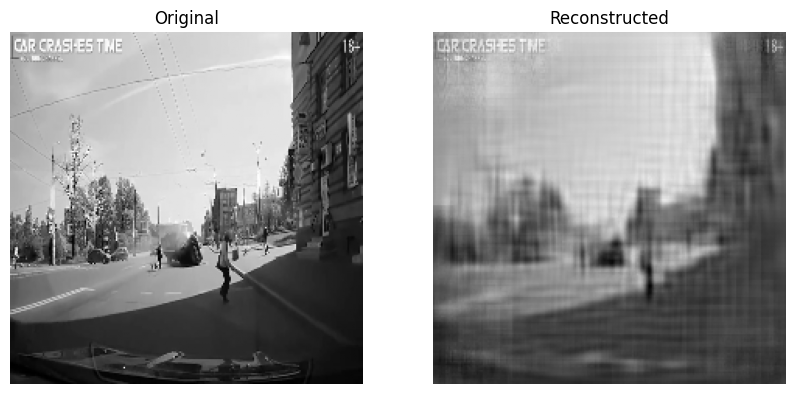

tensor(0.0115)


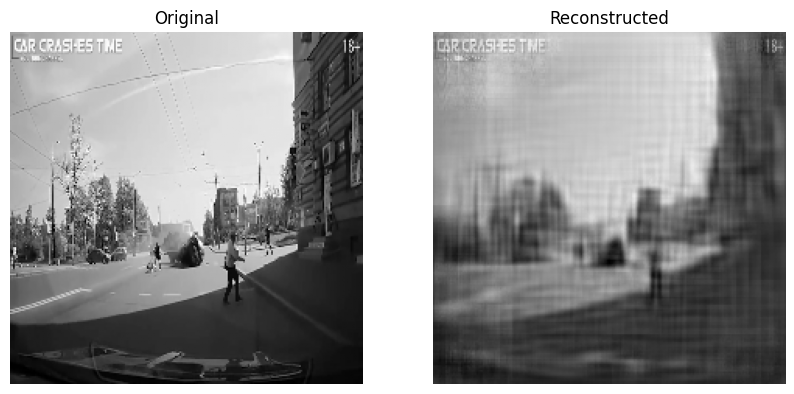

tensor(0.0120)


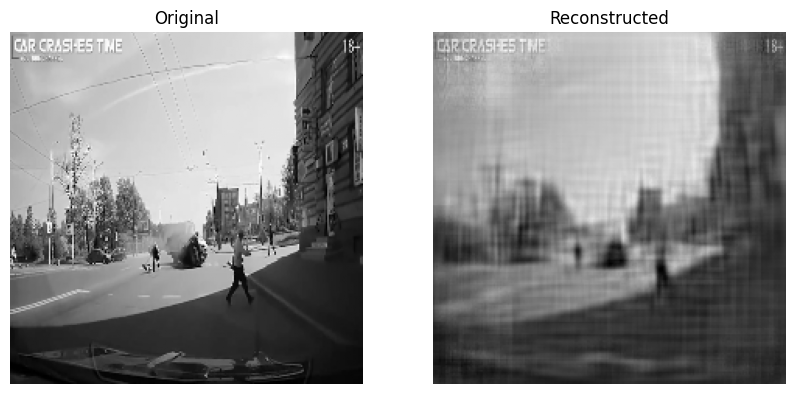

tensor(0.0124)


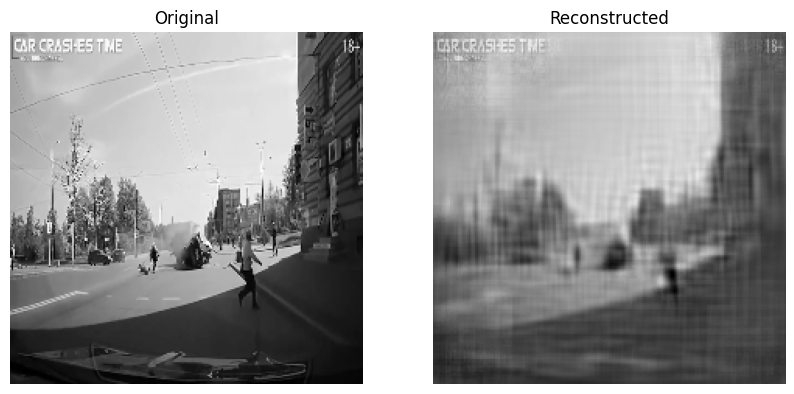

tensor(0.0130)


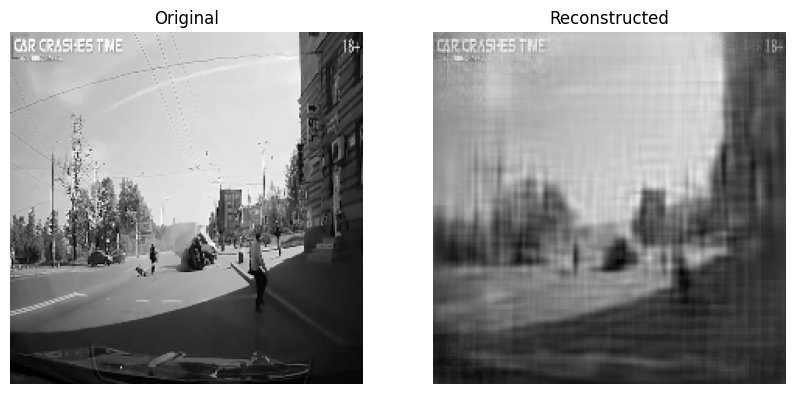

tensor(0.0134)


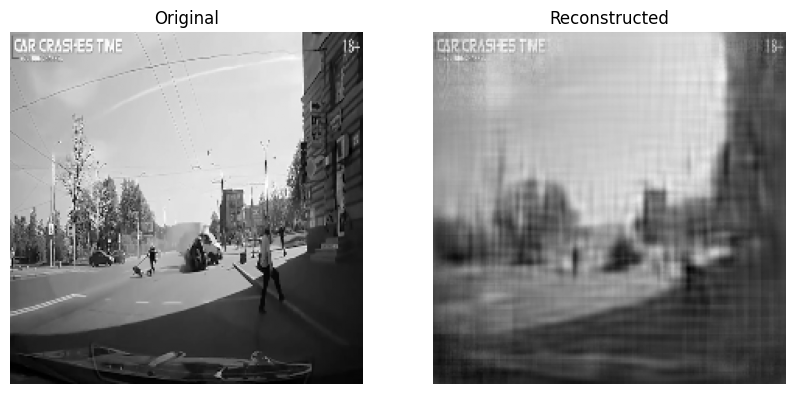

tensor(0.0144)


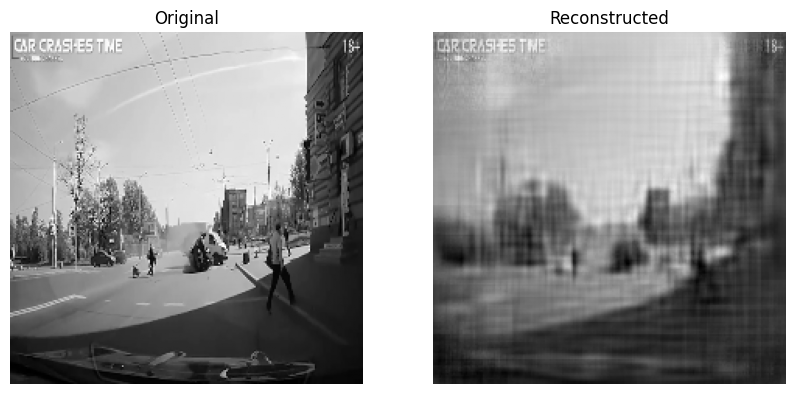

tensor(0.0153)


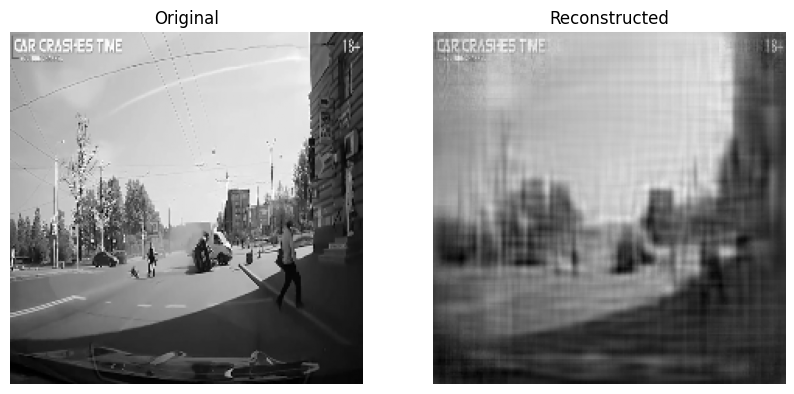

tensor(0.0165)


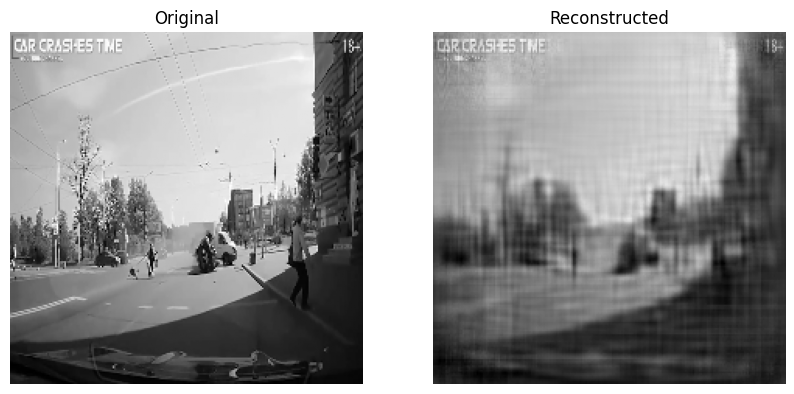

tensor(0.0174)


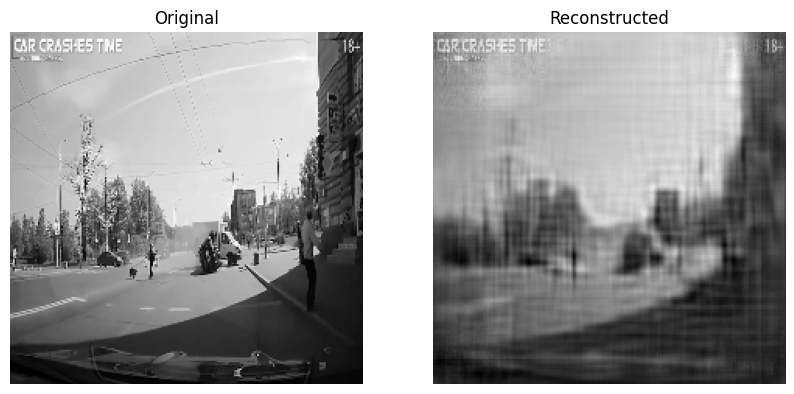

tensor(0.0185)


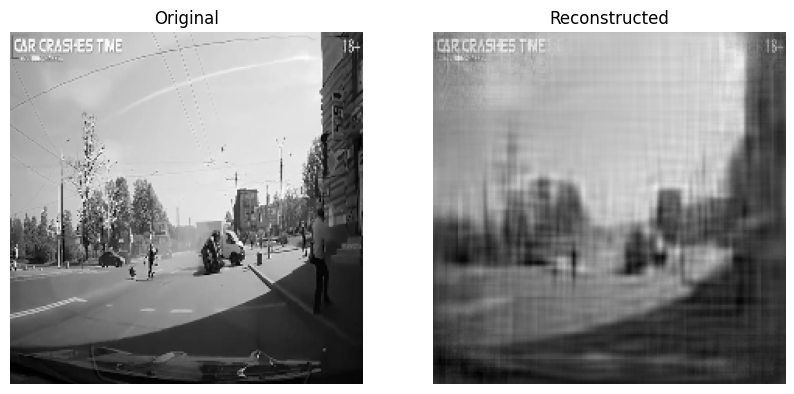

tensor(0.0193)


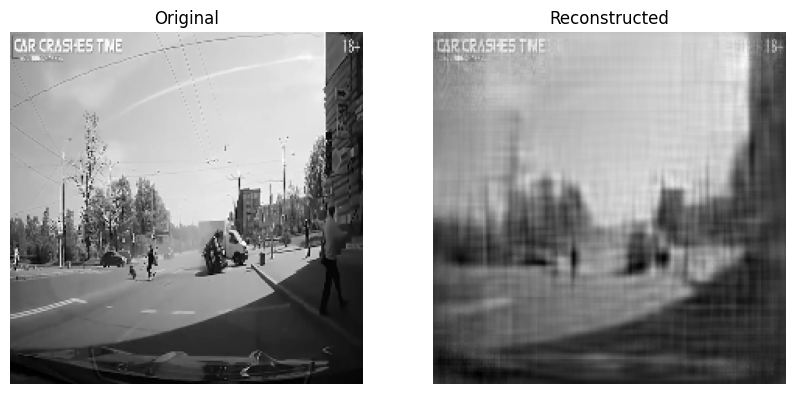

tensor(0.0192)


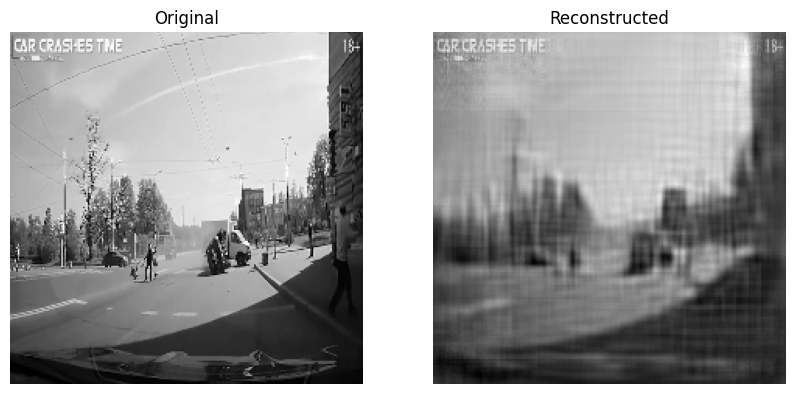

tensor(0.0208)


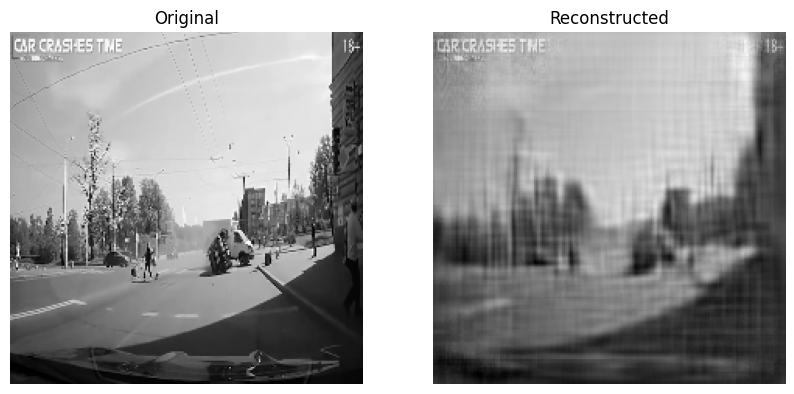

tensor(0.0221)


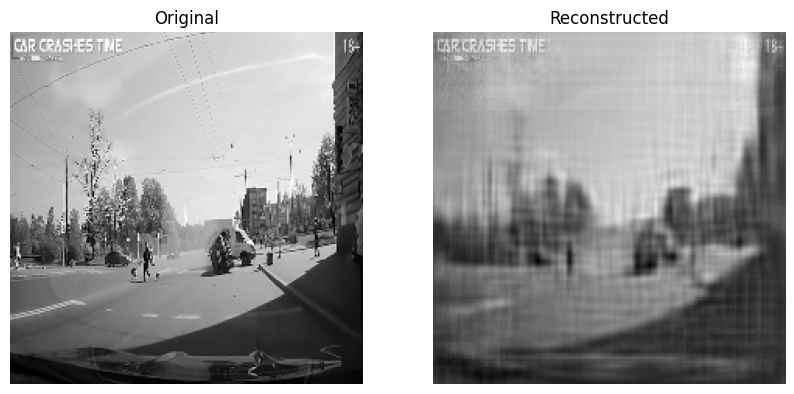

tensor(0.0223)


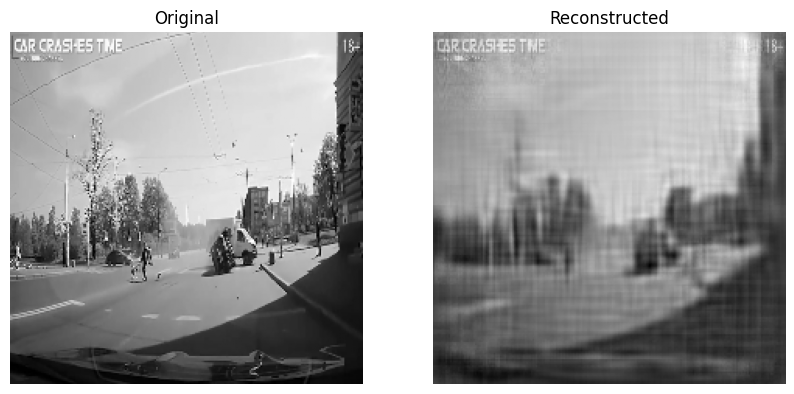

tensor(0.0228)


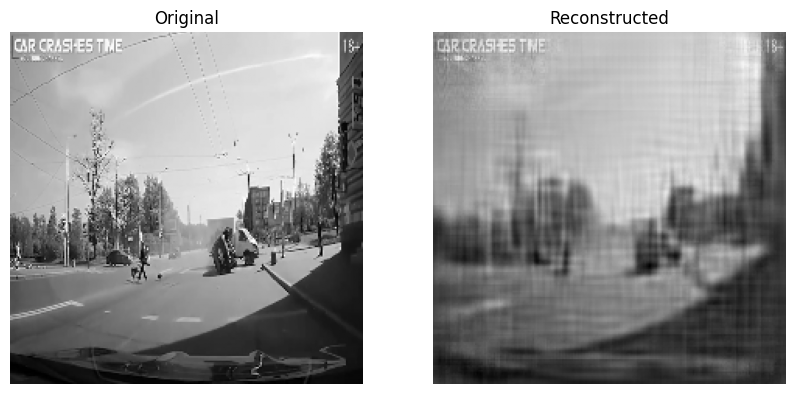

tensor(0.0230)


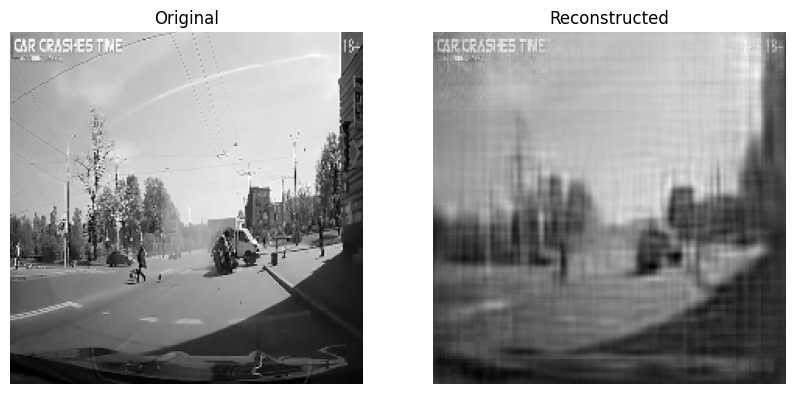

tensor(0.0230)


In [22]:
model = model.cpu()

for i in range(990, 1010):
    original = test_dataset[i][0].permute(1, 2, 0)
    reconstructed = model(test_dataset[i][0].unsqueeze(0))[0].detach().permute(1, 2, 0)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Original')
    axs[1].imshow(reconstructed, cmap='gray')
    plt.axis('off')
    axs[1].set_title('Reconstructed')
    plt.show()

    print(F.mse_loss(original, reconstructed))